In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

matplotlib.rcParams['axes.unicode_minus']=False

(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=500)

# print(train_data.shape, test_data.shape)
# print(train_data[0])
# print(len(train_data[0]))
# print(train_label)
# print(np.unique(train_label))

In [16]:
sub_data, val_data, sub_label, val_label = train_test_split(train_data, train_label, random_state=42)
train_seq = pad_sequences(sub_data, maxlen=100)
test_seq = pad_sequences(val_data, maxlen=100)

In [17]:
# print(len(sub_data[0]))
# print(len(sub_data[5]))
# print(len(sub_data[100]))
# print(len(train_seq[0]))
# print(len(train_seq[5]))
# print(len(train_seq[100]))
# print((train_seq[1]))


In [18]:
# train_oh = keras.utils.to_categorical(train_seq)
# test_oh = keras.utils.to_categorical(test_seq)
# print(train_oh[0][0][:12])
# print(np.sum(train_oh[0][0]))

In [19]:


# 4. 딥러닝 선언 
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
# model.add(keras.layers.GRU(8))
model.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8,dropout=0.3))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

# 5. 딥러닝 훈련 
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
293/293 [==============================] - 7s 20ms/step - loss: 0.5902 - accuracy: 0.6780 - val_loss: 0.4805 - val_accuracy: 0.7741
Epoch 2/100
293/293 [==============================] - 5s 19ms/step - loss: 0.4595 - accuracy: 0.7887 - val_loss: 0.4522 - val_accuracy: 0.7926
Epoch 3/100
293/293 [==============================] - 5s 18ms/step - loss: 0.4332 - accuracy: 0.8034 - val_loss: 0.4690 - val_accuracy: 0.7792
Epoch 4/100
293/293 [==============================] - 5s 18ms/step - loss: 0.4188 - accuracy: 0.8102 - val_loss: 0.4453 - val_accuracy: 0.7875
Epoch 5/100
293/293 [==============================] - 5s 19ms/step - loss: 0.4129 - accuracy: 0.8124 - val_loss: 0.4311 - val_accuracy: 0.7968
Epoch 6/100
293/293 [==============================] - 5s 18ms/step - loss: 0.4083 - accuracy: 0.8148 - val_loss: 0.4403 - val_accuracy: 0.7893
Epoch 7/100
293/293 [==============================] - 6s 19ms/step - loss: 0.4021 - accuracy: 0.8157 - val_loss: 0.4345 - val_accuracy:

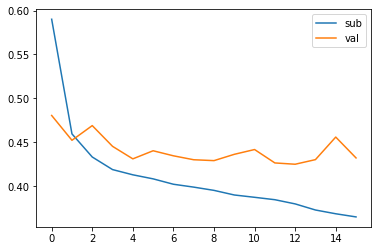

In [20]:

# 콜백 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-rnn.h5',save_best_only=True)
early_stopping_cb =  keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


# history = model.fit(train_data,train_label, epochs=20)
history = model.fit(train_seq,sub_label, epochs=100, batch_size=64,validation_data=(test_seq, val_label), callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)



score = model.evaluate(test_seq, val_label)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['sub','val'])
plt.show()



In [21]:
score

[0.42493337392807007, 0.8012800216674805]